In [2]:
import pandas as pd
import numpy as np

In [3]:
# Importing the dataset
dataset = pd.read_csv("Iris_data.csv")

In [4]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
dataset.shape

(150, 6)

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
dataset["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [8]:
# Chaecking NaN values
dataset.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [12]:
# Dividing data into Features and Labels
feature_columns = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
X = dataset[feature_columns].values
Y = dataset["Species"].values

In [13]:
X[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [15]:
Y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [18]:
# Label Encoding: Encoding the categorical data i.e Species
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
from sklearn.preprocessing import LabelEncoder

In [19]:
Y = LabelEncoder().fit_transform(Y)

In [22]:
Y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [23]:
# Training the model
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [24]:
# In this we are using the KNN alogorithm for taining the model
from sklearn.neighbors import KNeighborsClassifier 

In [64]:
# Here we are creating a model and training the model
model = KNeighborsClassifier(n_neighbors=12).fit(X_train, Y_train)

In [65]:
# Predicting the Test set results
Y_pred = model.predict(X_test)

In [66]:
X_test.shape

(45, 4)

In [67]:
X_test[:5]

array([[5.7, 2.8, 4.5, 1.3],
       [7.2, 3.6, 6.1, 2.5],
       [6.8, 2.8, 4.8, 1.4],
       [4.9, 3.1, 1.5, 0.1],
       [5.1, 3.5, 1.4, 0.3]])

In [68]:
Y_pred

array([1, 2, 1, 0, 0, 1, 1, 1, 2, 0, 2, 1, 2, 0, 1, 0, 2, 0, 0, 2, 1, 2,
       0, 1, 1, 0, 1, 0, 1, 1, 2, 0, 0, 2, 1, 2, 1, 2, 2, 0, 2, 2, 2, 1,
       1])

In [69]:
# Calculating the model accuracy
# accuracy_score: It is ratio of number of correct output and total number of output
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, Y_pred)*100
print("Accuracy of our model is equal " + str(round(accuracy, 1)) + "%")

Accuracy of our model is equal 95.6%


Using Cross-validation for parameter tuning

In [49]:
k_list = list(range(1,50,2))

In [50]:
k_list

[1,
 3,
 5,
 7,
 9,
 11,
 13,
 15,
 17,
 19,
 21,
 23,
 25,
 27,
 29,
 31,
 33,
 35,
 37,
 39,
 41,
 43,
 45,
 47,
 49]

In [51]:
from sklearn.model_selection import cross_val_score

In [52]:
# Creating list of K for KNN
k_list = list(range(1,50,2))

# Creating list of cv scores
cv_scores = []

# Perform 10-flod cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=10, scoring="accuracy")
    cv_scores.append(scores.mean())

In [55]:
scores.mean()

0.9400000000000001

In [54]:
cv_scores

[0.96,
 0.9666666666666666,
 0.9666666666666668,
 0.9666666666666668,
 0.9733333333333334,
 0.9666666666666668,
 0.9800000000000001,
 0.9733333333333334,
 0.9733333333333334,
 0.9733333333333334,
 0.9666666666666666,
 0.9733333333333334,
 0.9666666666666666,
 0.9666666666666666,
 0.9533333333333334,
 0.9466666666666667,
 0.9466666666666667,
 0.9466666666666667,
 0.9466666666666667,
 0.9533333333333334,
 0.9533333333333334,
 0.9466666666666667,
 0.9333333333333333,
 0.9333333333333333,
 0.9400000000000001]

In [57]:
# Getting the error

error = []
for i in cv_scores:
    error.append(1-i)

In [58]:
error

[0.040000000000000036,
 0.03333333333333344,
 0.033333333333333215,
 0.033333333333333215,
 0.026666666666666616,
 0.033333333333333215,
 0.019999999999999907,
 0.026666666666666616,
 0.026666666666666616,
 0.026666666666666616,
 0.03333333333333344,
 0.026666666666666616,
 0.03333333333333344,
 0.03333333333333344,
 0.046666666666666634,
 0.053333333333333344,
 0.053333333333333344,
 0.053333333333333344,
 0.053333333333333344,
 0.046666666666666634,
 0.046666666666666634,
 0.053333333333333344,
 0.06666666666666665,
 0.06666666666666665,
 0.05999999999999994]

In [62]:
# Creating some plots

from matplotlib import pyplot as plt
import seaborn as sns

<Figure size 640x480 with 0 Axes>

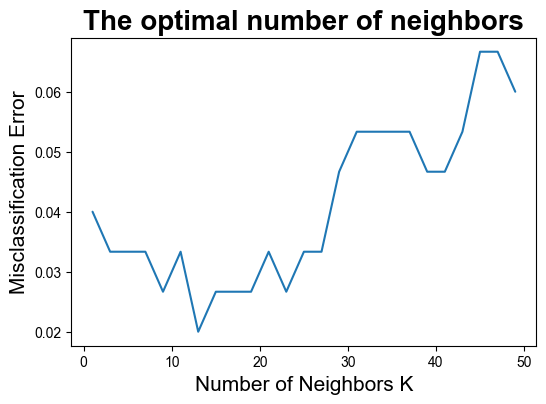

In [63]:
plt.figure()
plt.figure(figsize = (6,4))
plt.title("The optimal number of neighbors", fontsize=20, fontweight="bold")
plt.xlabel("Number of Neighbors K", fontsize=15)
plt.ylabel("Misclassification Error", fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, error)
plt.show()

In [70]:
# Saving the model
model


KNeighborsClassifier(n_neighbors=12)

In [71]:
pwd

'C:\\Users\\Lenovo\\OneDrive\\Desktop\\Juypter_projects'

In [72]:
import joblib

In [73]:
# Save the model as pickel file
joblib.dump(model, "Iris_model.pkl")

['Iris_model.pkl']

In [75]:
load_model = joblib.load("Iris_model.pkl")